<h1 style="font-weight: bold; text-align: center;">Preprocessing - Pipeline</h1>

---

<h1>1 - Notebook Setup</h1>

<h2>1.1 - Imports</h2>

In [22]:
# NLP
from nltk.metrics.distance import jaccard_distance
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from string import punctuation
from nltk.util import ngrams

import nltk

# metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# visualization
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# data manipulation
from pathlib import Path

import pandas as pd
import numpy as np
import re
import os

# Download NLP dependencies
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Matheus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Matheus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Matheus\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

<h2>1.2 - Dataset path</h2>

In [2]:
try:
    from google.colab import drive 
    drive.mount('/content/gdrive')
    df_path = Path('/content/gdrive/MyDrive/')
    figure_path = Path('/content')
    ENV = 'Google Colab'
except Exception as error:
    df_path = Path(os.getcwd().replace('notebooks', 'data/raw'))
    figure_path = Path(os.getcwd().replace('notebooks', 'figures'))
    ENV = 'Local Machine'

print(f'[\033[1;33mENVIRONMENT\033[0m]: {ENV}')
print(f'Dataset located in {df_path}')

[ENVIRONMENT]: Local Machine
Dataset located in c:\Users\Matheus\WorkSpace\ChatBot\data\raw


<h1>2 - Dataset</h1>

<h2>2.1 - Loading dataset</h2>

In [3]:
data_frame = pd.read_csv(df_path.joinpath('chatbot_dataset.csv'), encoding='utf-8', delimiter=",", on_bad_lines='skip')

<h3>2.1.1 - Converting all rows in strings</h3>

In [4]:
data_frame['question'] = data_frame['question'].apply(lambda row: str(row))
data_frame['answer'] = data_frame['answer'].apply(lambda row: str(row))

In [5]:
data_frame

,Unnamed: 0,question,answer
0,0,Who did the first work generally recognized as...,Warren McCulloch and Walter Pitts (1943).
1,1,What sources was drawn on the formation of the...,knowledge of the basic physiology and function...
2,2,Who created the Hebbian learning rule?,Donald Hebb (1949).
3,3,When the first neural network is built?,1950.
4,4,What is the first neural network called?,The SNARC.
...,...,...,...
4348,4348,How do you treat a snake bite?,While waiting for medical help: 1)Move the per...
4349,4349,How do you treat a animal bite?,1)Wash the wound with soap and warm water. 2)G...
4350,4350,What to do if someone is Drowning?,1)Place your ear next to the person's mouth an...
4351,4351,How to give CPR??,"1)For an adult or child, place the heel of one..."


In [6]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4353 entries, 0 to 4352
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4353 non-null   int64 
 1   question    4353 non-null   object
 2   answer      4353 non-null   object
dtypes: int64(1), object(2)
memory usage: 102.1+ KB


<h2>2.2 - Cleaning text</h2>

In [7]:
unwantedChars = [
    '\'', 
    '\"',
    '/p',
    'ª',
    'º',
    '.',
    '!',
    '?',
    ',',
    ';',
    ':',
    '-',
    '\'',
    '!!',
    '``',
    '"'
    ]
unwantedWords = [
    '\'s',
    "n't",
    '\'m',
    '\'ll',
    '\'re'
]

stopwords = set(stopwords.words('english') + list(punctuation) + list(unwantedChars) + list (unwantedWords))

<h3>2.2.1 - Removing Stop Words</h3>

In [8]:
def removeStopWords(text):
  filteredWords = [word for word in word_tokenize(text.lower()) if word not in stopwords]
  return [word for word in filteredWords if len(word) > 1]

def plotWordCloud(data_tokenized):
  allWordsInRows = data_tokenized[:][:]
  allWords = []

  for wordsRow in allWordsInRows:
    allWords.extend(wordsRow)

  frequencies = nltk.FreqDist(allWords)
  sorted(frequencies,key=frequencies.__getitem__, reverse=True)

  wordcloud = WordCloud().generate_from_frequencies(frequencies)
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

  return allWordsInRows, frequencies, allWords

def plotFrenquencies(fr):
  fr.plot(20,cumulative=False)

<h3>2.2.2 - Word Cloud of 'Question' column with Stop Words</h3>

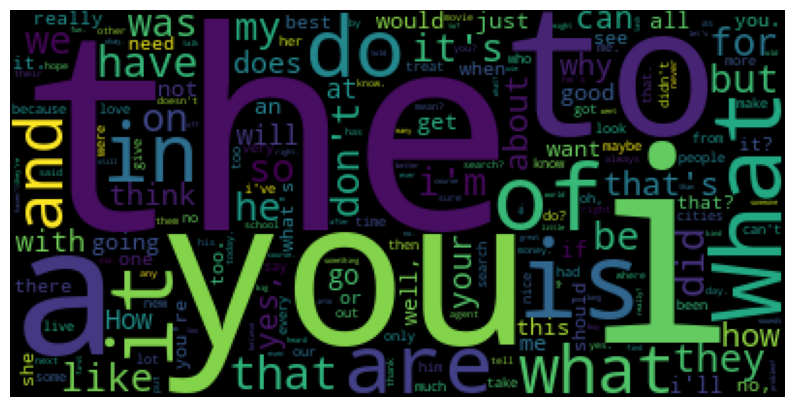

In [9]:
allWords, allWordsInRows, frequencies = plotWordCloud(data_frame['question'].apply(lambda row: [word for word in row.split(' ')]))

<h3>2.2.3 - Word Cloud of 'Answer' column with Stop Words</h3>

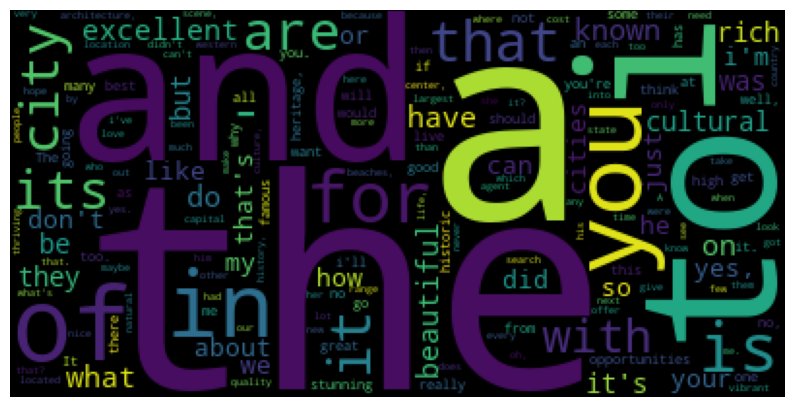

In [10]:
allWords, allWordsInRows, frequencies = plotWordCloud(data_frame['answer'].apply(lambda row: [word for word in row.split(' ')]))

<h3>2.2.4 - Removing Stop Words</h3>

In [11]:
question_tokenized = data_frame['question'].apply(removeStopWords)
answer_tokenized = data_frame['answer'].apply(removeStopWords)

<h3>2.2.5 - Word Cloud of 'Question' column without Stop Words</h3>

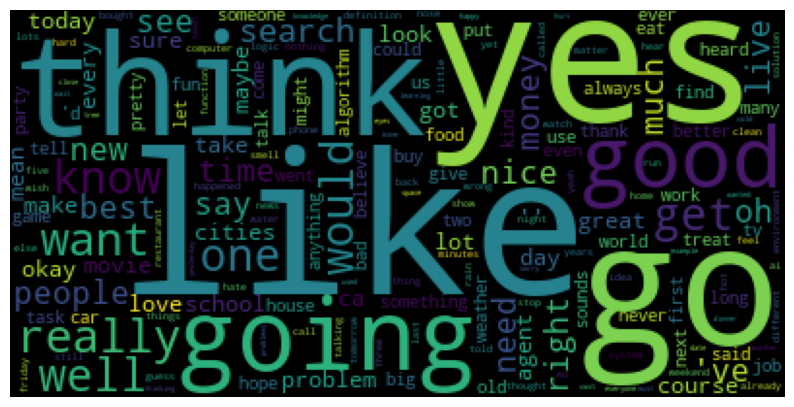

In [12]:
allWords, allWordsInRows, frequencies = plotWordCloud(question_tokenized)

<h3>2.2.6 - Word Cloud of 'Answer' column without Stop Words</h3>

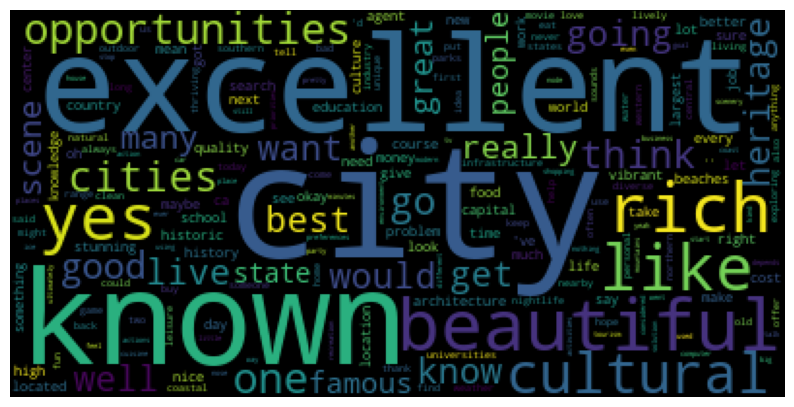

In [13]:
allWords, allWordsInRows, frequencies = plotWordCloud(answer_tokenized)

<h3>2.2.7 - Creating new dataset</h3>

In [14]:
data_frame_cleaned_1 = pd.concat(
    objs=[
        question_tokenized.apply(lambda row: ' '.join(row)),
        answer_tokenized.apply(lambda row: ' '.join(row))
    ],
    axis=1
)

In [15]:
data_frame_cleaned_1

,question,answer
0,first work generally recognized ai,warren mcculloch walter pitts 1943
1,sources drawn formation first work generally r...,knowledge basic physiology function neurons br...
2,created hebbian learning rule,donald hebb 1949
3,first neural network built,1950
4,first neural network called,snarc
...,...,...
4348,treat snake bite,waiting medical help move person beyond striki...
4349,treat animal bite,wash wound soap warm water gently press clean ...
4350,someone drowning,place ear next person mouth nose feel air chee...
4351,give cpr,adult child place heel one hand center chest n...


### 2.2.8 - Correcting Words

In [23]:
correct_words = words.words()

In [79]:
def word_corrector(sentence: str) -> str:
    fixed_sentence = []
    for word in sentence.strip().split(' '):
        word = word.strip()
        if len(word):
            try:
                temp = [(jaccard_distance(label1=set(ngrams(word, 2)), label2=set(ngrams(w, 2))), w) for w in correct_words if w[0]==word[0]]
                fixed_sentence.append(sorted(temp, key = lambda val:val[0])[0][1])
            except:
                return '...'
    return ' '.join(fixed_sentence)

In [80]:
data_frame_cleaned_1['question_word_corrected'] = data_frame_cleaned_1['question'].apply(func=word_corrector)
data_frame_cleaned_1['answer_word_corrected'] = data_frame_cleaned_1['answer'].apply(func=word_corrector)